## We are building a workflow trying to learn LangGraph.

- First define the state of the graph as this is basically the input that is given to each  and edge of the graph.
- We are using typedDict to maintain the output in key value format.
- Here we have 3 nodes they are conversational, unstructured data and the last for structural data.

In [18]:
from typing_extensions import TypedDict, Literal
import random

class State(TypedDict):
    output: str

In [19]:
# This is our start function or node
def agent_start(state: State) -> State:
    print("We have started the agent.")
    state["output"] = "LangGraph agent has been started"
    return state

# This is our conversational function or node
def agent_conversational(state: State) -> State:
    print("We are in conversational mode.")
    state["output"] = "LangGraph is using conversational tool."
    return state

# This is our vector search function or node
def agent_vector_search(state: State) -> State:
    print("We are in vector search mode.")
    state["output"] = "LangGraph is using vector search tool."
    return state

# This is our structural data function or node
def agent_genie(state: State) -> State:
    print("We are in genius mode.")
    state["output"] = "LangGraph is using genie for structural data."
    return state


def agent_end(state: State) -> State:
    print("We have ended the agent.")
    state["output"] = "We got the required output from LangGraph agent."
    return state


# A simple function to decide the next node based on some condition
def decide_next_node(state: State) -> Literal['CONVERSATIONAL_TOOL', "VECTOR_SEARCH_TOOL", "GENIE_TOOL"]:
    number = random.randint(1, 3)
    if number == 1:
        return "CONVERSATIONAL_TOOL"
    elif number == 2:
        return "VECTOR_SEARCH_TOOL"
    else:
        return "GENIE_TOOL"

In [20]:
# Importing necessary modules from langgraph
from IPython.display import display, Markdown, Image
from langgraph.graph import StateGraph, START, END

# Defining the state graph
unifiedAgent = StateGraph(State)

# Adding nodes to the graph
unifiedAgent.add_node("STARTING CONVERSATION", agent_start)
unifiedAgent.add_node("CONVERSATIONAL_TOOL", agent_conversational)
unifiedAgent.add_node("VECTOR_SEARCH_TOOL", agent_vector_search)
unifiedAgent.add_node("GENIE_TOOL", agent_genie)  

# Scheduling the flow of the graph
unifiedAgent.add_edge(START, "STARTING CONVERSATION")
unifiedAgent.add_conditional_edges("STARTING CONVERSATION", decide_next_node)
unifiedAgent.add_edge("CONVERSATIONAL_TOOL", END)
unifiedAgent.add_edge("VECTOR_SEARCH_TOOL", END)
unifiedAgent.add_edge("GENIE_TOOL", END)

# Compiling the graph
compliedunifiedAgent = unifiedAgent.compile()

In [25]:
compliedunifiedAgent.invoke({"output": "My name is Vinay and I am a data engineer."})

We have started the agent.
We are in conversational mode.


{'output': 'LangGraph is using conversational tool.'}

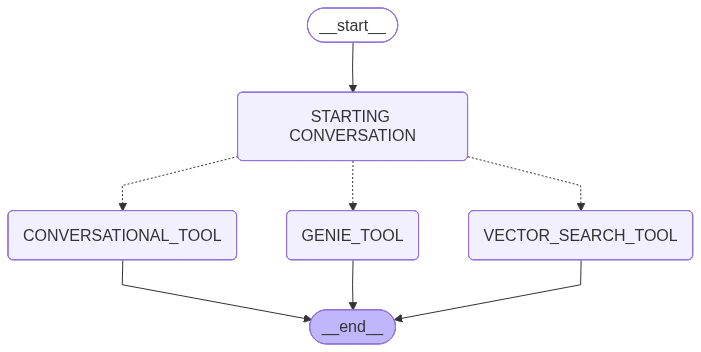

In [21]:
display(Image(compliedunifiedAgent.get_graph().draw_mermaid_png()))